# Compte rendu numéro 1 -  01-03/05-03

## Imports

In [2]:
%load_ext autoreload
%autoreload 2
import os
cwd = os.getcwd()
print(cwd)

C:\Users\jrusp\Desktop\Code CM


In [3]:
from utils import plot_img
from runwatermaze import perform_pearce

### Comportement du modèle de Geerts sur la première expérience de l'article de Pearce

Il y a des différences entre les valeurs des paramêtres dans le code disponible sur GIT et dans l'appendix de l'article de Geerts 

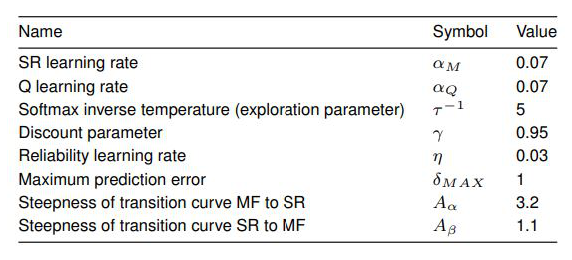

In [36]:
plot_img("parameters.jpg")


Ci-dessus, les paramêtres données dans l'appendix.
<br>
<br>
Dans le code, les paramêtres qui changent sont:
<ul>
    <li>
    gamma = 0.99
    </li>
    <li>
    sr_lr = 0.1
    </li>
    <li>
    q_lr = 0.1
    </li>
    <li>
    A_alpha = 1
    </li>
    <li>
    A_beta = 0.5
    </li>
</ul>
De plus dans l'article, le diamêtre de l'hexagone n'est pas donné de manière explicite, toutefois il semble qu'il fasse 10 cases de rayon. C'est aussi la valeur qui est présente dans le code.

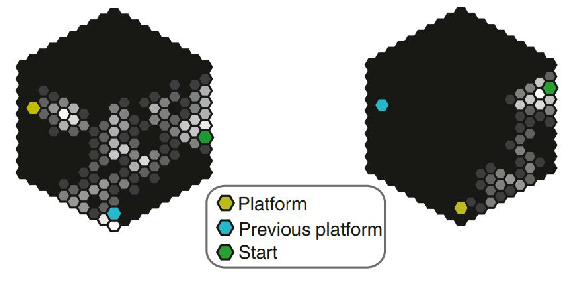

In [42]:
plot_img("maze_10.jpg")

Ci-dessus, une image du water-maze issue de l'article de Geerts

Voilà ci-dessous les résultats qu'on obtient avec les paramêtres indiqués dans l'appendix de Geerts, sur un hexagone de rayon 10.
<br>
<br>
Dans la figure en haut à droite, les traits oranges indiquent chaque nouvelle session et donc un changement d'emplacement de la plateforme.
<br>
<br>
Dans la figure en bas à gauche, P(SR) indique le poids de la Successor Representation dans la prise de décision
<br>
<br>
Dans la figure en bas à droite, chaque valeur de x correspond à l'identifiant de la plateforme (qui en compte 270)

In [43]:
exp = "first_exp_pearce"
maze_size = 10
n_sessions = 11
n_trials = 4
n_agents = 100
sr_lr = 0.07
q_lr = 0.07
inv_temp = 5
gamma = 0.95
eta = 0.03 # reliability learning rate
mpe = 1 # maximum prediction error
A_alpha = 3.2 # Steepness of transition curve MF to SR 
A_beta = 1.1 # Steepness of transition curve SR to MF 

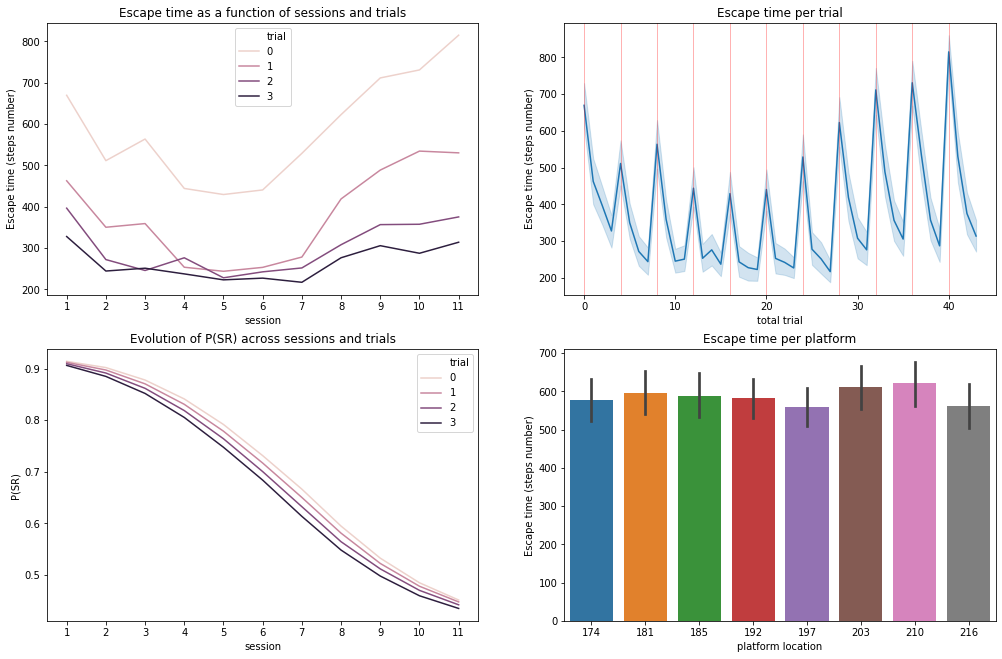

In [44]:
perform_pearce(exp, maze_size, n_trials, n_sessions, n_agents, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta)

On ne retrouve pas totalement les résultats originaux de Pearce, affichés ci-dessous:

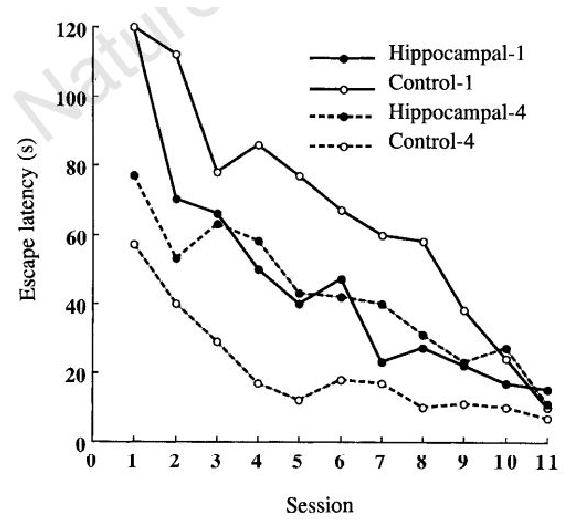

In [45]:
plot_img('results_pearce.jpg')

Ni mêmes ceux de Geerts, affichés ci-dessous:

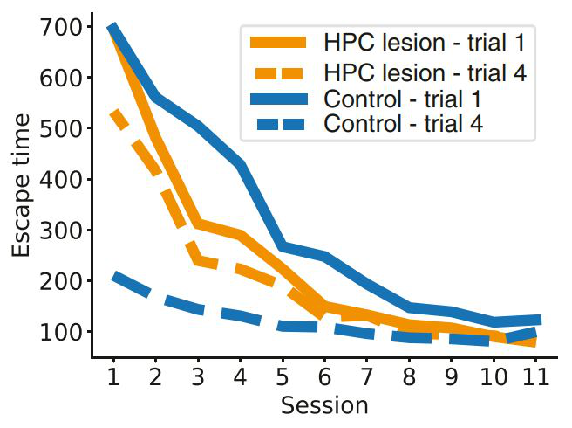

In [68]:
plot_img('geerts_exp_1.jpg')

J'ai pu les répliquer en modifiant la température et le learning-rate de la SR et du Q-learning. 

In [53]:
exp = "first_exp_pearce"
maze_size = 10
n_sessions = 11
n_trials = 4
n_agents = 100
sr_lr = 0.03 # <- Anciennement 0.07
q_lr = 0.03 # <- Anciennement 0.07
inv_temp = 16 # <- Anciennement 5
gamma = 0.95
eta = 0.03 # reliability learning rate
mpe = 1 # maximum prediction error
A_alpha = 3.2 # Steepness of transition curve MF to SR 
A_beta = 1.1 # Steepness of transition curve SR to MF 

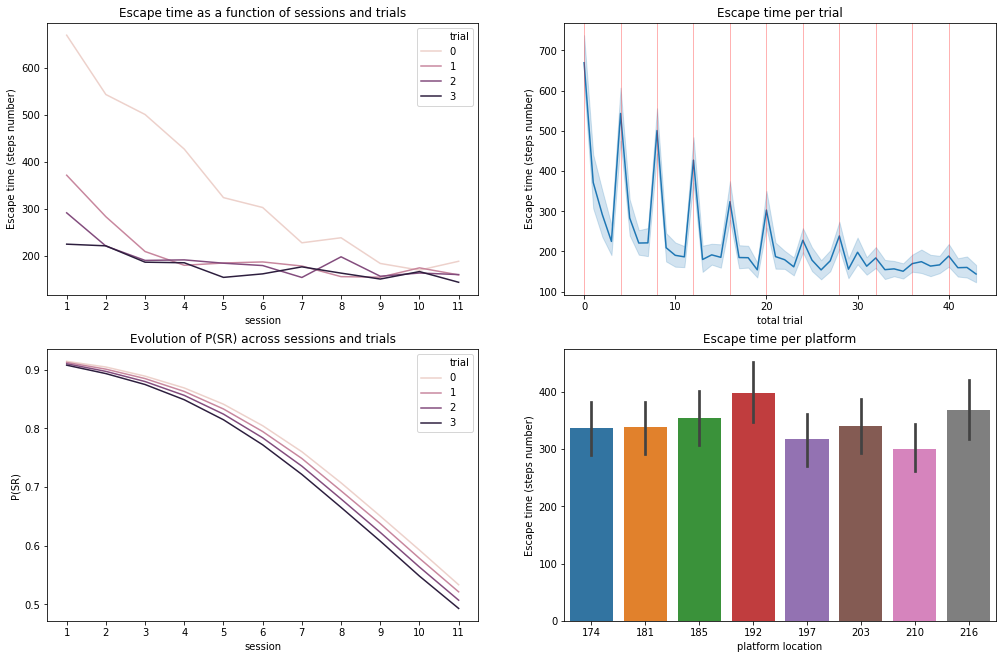

In [54]:
perform_pearce(exp, maze_size, n_trials, n_sessions, n_agents, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta)

#### Exploration

Benoît se demandait si le modèle ne finirait pas par totalement se fier au système égocentrique si on augmentait le nombre de sessions

In [14]:
exp = "first_exp_pearce"
maze_size = 10
n_sessions = 20 # <- Anciennement 11
n_trials = 4
n_agents = 100
sr_lr = 0.03 # <- Anciennement 0.07
q_lr = 0.03 # <- Anciennement 0.07
inv_temp = 16 # <- Anciennement 5
gamma = 0.95
eta = 0.03 # reliability learning rate
mpe = 1 # maximum prediction error
A_alpha = 3.2 # Steepness of transition curve MF to SR 
A_beta = 1.1 # Steepness of transition curve SR to MF 

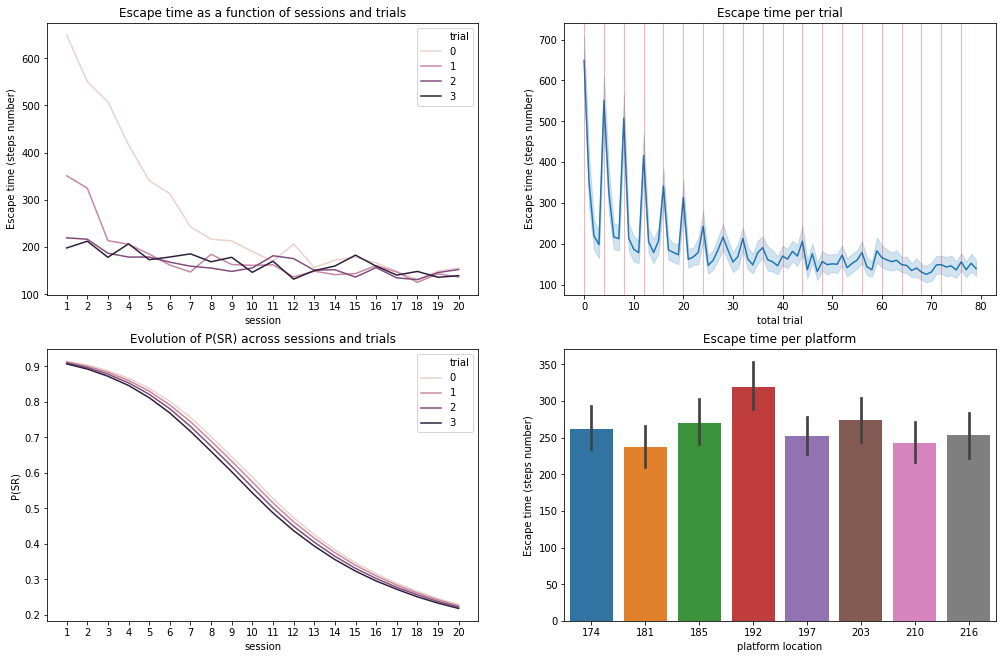

In [30]:
perform_pearce(exp, maze_size, n_trials, n_sessions, n_agents, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta)

C'est ce qu'on observe, les performances au premier essai d'une session deviennent similaires au deuxième, troisième et quatrième essais après les sessions 15-16

### Comportement du modèle de Geerts sur la deuxième expérience de Pearce

Dans l'article de Pearce, une seconde expérience est décrite où des sujets sont soumis à un changement de la localisation de plateforme à chaque trial. Le but de cette expérience est de montrer que les sujets soumis à un changement de plateforme à chaque trial produisent les mêmes résultats que les sujets atteints de dommages à l'hippocampe, ces deux groupes utilisant la stratégie égocentrique.

In [55]:
exp = "second_exp_pearce"
maze_size = 10
n_sessions = 11 # Anciennement 11
n_trials = 4
n_agents = 100
sr_lr = 0.03
q_lr = 0.03
inv_temp = 16
gamma = 0.95
eta = 0.03 # reliability learning rate
mpe = 1 # maximum prediction error
A_alpha = 3.2 # Steepness of transition curve MF to SR 
A_beta = 1.1 # Steepness of transition curve SR to MF 

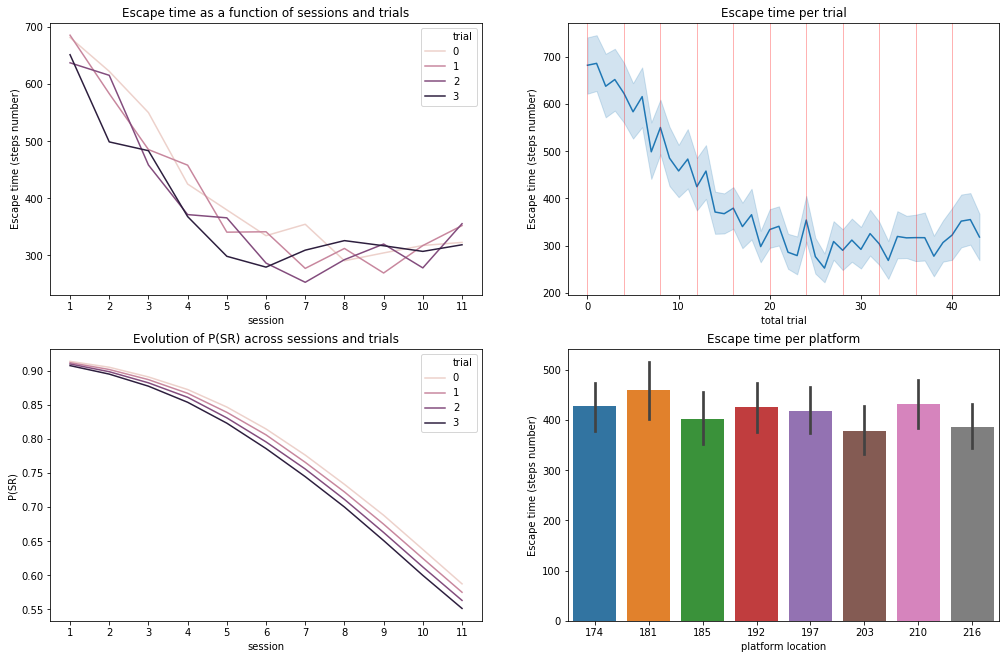

In [56]:
perform_pearce(exp, maze_size, n_trials, n_sessions, n_agents, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta)

On observe bien des résultats proches de ceux obtenus par Pearce (ci-dessous), toutefois, les performances finales à la session 11 sont inférieures à celles enregistrées lors de l'expérience 1 (300 steps contre 150). Les performances finales des rats sont elles similaires à la fin de l'expérience 2 et 1 (15 secondes). 
<br>
<br>
Le P(SR) est anormalement élevé à la fin de l'expérience (0.55) compte tenu que seule la stratégie égocentrique est supposée permettre d'aider à trouver la récompense. 

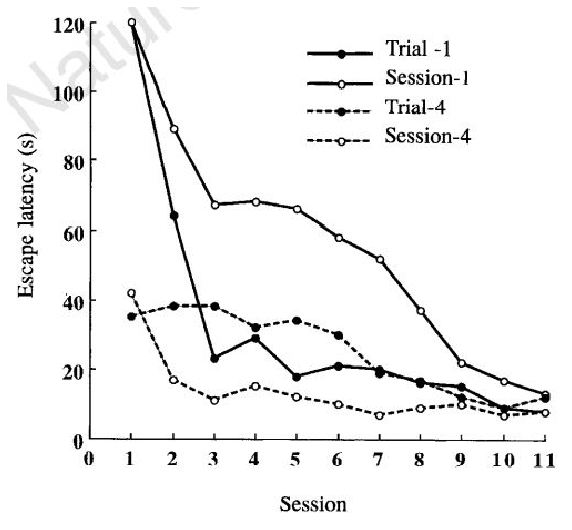

In [62]:
plot_img("results_pearce_2.jpg")

Dans le code de Geerts, le drapeau est bien placé systématiquement une case au dessus de la plateforme. Placer le drapeau directement sur la plateforme améliore un peu les performances, mais le modèle reste limité par le reliability learning-rate (eta)

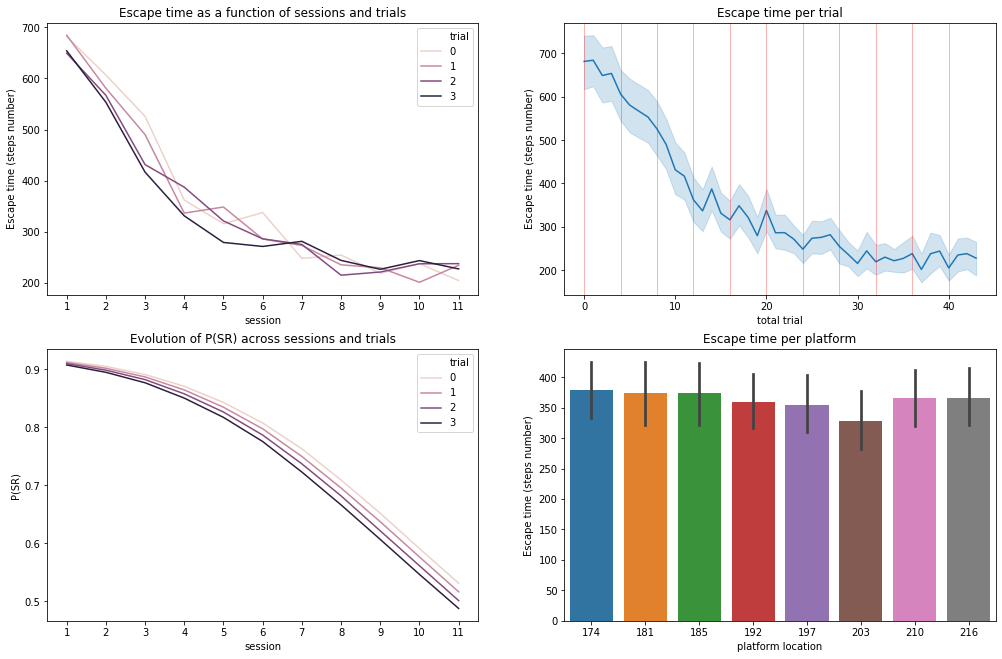

In [66]:
perform_pearce(exp, maze_size, n_trials, n_sessions, n_agents, sr_lr, q_lr, inv_temp, gamma, eta, mpe, A_alpha, A_beta, dland=False)